In [1]:
# import module
import pandas as pd
import numpy as np
import re # 정규화 함수 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False ## 마이나스 '-' 표시 제대로 출력
 
from scipy.stats import t
from statsmodels.formula.api import ols

%matplotlib inline

In [2]:
long_term_frgn = pd.read_csv('02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV', encoding = 'cp949')
long_term_frgn.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주


## 데이터 정보
- base_date: 기준일자
- time: 시간
- nationality: 외국인 국적코드 
- city: 시 구분
- emd_cd: 행정동 코드   
- emd_nm: 행정동명
- resd_pop_cnt: 거주인구
- work_pop_cnt: 근무인구
- visit_pop_cnt: 방문인구
- resd: 거주지역행정구역 

In [3]:
long_term_frgn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23837317 entries, 0 to 23837316
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   base_date      object 
 1   time           int64  
 2   nationality    object 
 3   city           object 
 4   emd_cd         int64  
 5   emd_nm         object 
 6   resd_pop_cnt   float64
 7   work_pop_cnt   float64
 8   visit_pop_cnt  float64
 9   resd           object 
dtypes: float64(3), int64(2), object(5)
memory usage: 1.8+ GB


In [4]:
long_term_frgn.describe()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
count,2.383732e+07,2.383732e+07,2.383732e+07,2.383732e+07,2.383732e+07
mean,1.258220e+01,5.011815e+07,1.990293e+01,1.967458e+00,1.220041e+01
std,6.891328e+00,9.701363e+03,8.986931e+01,1.096398e+01,2.942838e+01
min,1.000000e+00,5.011025e+07,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.000000e+00,5.011053e+07,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.300000e+01,5.011065e+07,3.374900e+00,0.000000e+00,4.762100e+00
75%,1.900000e+01,5.013031e+07,1.287350e+01,0.000000e+00,1.057540e+01
max,2.400000e+01,5.013062e+07,2.824157e+03,7.668845e+02,1.395747e+03


In [5]:
def Month(date_before):
    date_splited = date_before.split('-')
    d, m, y = date_splited
    date_month = m
    return date_month

In [6]:
def Year(date_before):
    date_splited = date_before.split('-')
    y, m, d = date_splited
    date_year = y
    return date_year

In [7]:
long_term_frgn['Month'] = long_term_frgn["base_date"].map(Month)

In [8]:
long_term_frgn['Year'] = long_term_frgn["base_date"].map(Year)

In [9]:
long_term_frgn.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주,01,2018
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주,01,2018
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외,01,2018
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외,01,2018
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주,01,2018


In [10]:
long_term_frgn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23837317 entries, 0 to 23837316
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   base_date      object 
 1   time           int64  
 2   nationality    object 
 3   city           object 
 4   emd_cd         int64  
 5   emd_nm         object 
 6   resd_pop_cnt   float64
 7   work_pop_cnt   float64
 8   visit_pop_cnt  float64
 9   resd           object 
 10  Month          object 
 11  Year           object 
dtypes: float64(3), int64(2), object(7)
memory usage: 2.1+ GB


In [11]:
long_term_frgn['Month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [12]:
# long_term_frgn['Month'] = pd.to_numeric(long_term_frgn['Month'])
# long_term_frgn['Year'] = pd.to_numeric(long_term_frgn['Year'])

In [13]:
long_term_frgn['Month'].value_counts()

05    2325300
06    2313186
03    2259356
01    2228654
04    2201196
02    2031061
08    1825102
07    1768989
10    1746170
12    1745932
11    1711088
09    1681283
Name: Month, dtype: int64

In [14]:
January = long_term_frgn[long_term_frgn['Month'].str.contains('01')]
February = long_term_frgn[long_term_frgn['Month'].str.contains('02')]
March = long_term_frgn[long_term_frgn['Month'].str.contains('03')]
April = long_term_frgn[long_term_frgn['Month'].str.contains('04')]
May = long_term_frgn[long_term_frgn['Month'].str.contains('05')]
Jun = long_term_frgn[long_term_frgn['Month'].str.contains('06')]
July = long_term_frgn[long_term_frgn['Month'].str.contains('07')]
August = long_term_frgn[long_term_frgn['Month'].str.contains('08')]
September = long_term_frgn[long_term_frgn['Month'].str.contains('09')]
October = long_term_frgn[long_term_frgn['Month'].str.contains('10')]
November = long_term_frgn[long_term_frgn['Month'].str.contains('11')]
December = long_term_frgn[long_term_frgn['Month'].str.contains('12')]

### 이상치 탐지 및 제거 

### 1월 

1) scaling method

In [15]:
Jan = January.copy()

C:\Users\LEE RY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2759.5443

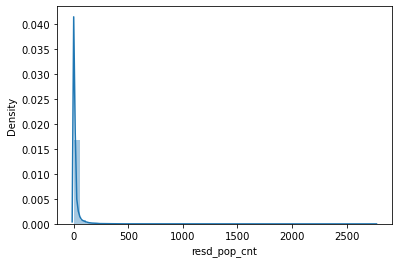

In [16]:
# 확률분포에서 찾기 (resd_pop_cnt)
sns.distplot(Jan['resd_pop_cnt']);
Jan['resd_pop_cnt'].max()

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
# 표준 스케일링 
Jan['resd_pop_scaled'] = scaler.fit_transform(Jan[['resd_pop_cnt']])
Jan[:2]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0,4.5802,제주,01,2018,-0.155972
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0,5.7051,제주,01,2018,4.407695


In [19]:
sorted_resd = Jan.sort_values(by = "resd_pop_scaled")
sorted_resd['resd_pop_scaled'][:10]

20832740   -0.222349
6757492    -0.222349
6757493    -0.222349
6757494    -0.222349
6757495    -0.222349
13779094   -0.222349
6757497    -0.222349
13779092   -0.222349
6757499    -0.222349
6757500    -0.222349
Name: resd_pop_scaled, dtype: float64

In [20]:
sorted_resd['resd_pop_scaled'][-10:]

252982    28.314009
188543    28.316634
286932    28.338390
161326    28.344637
272035    28.353740
272711    28.355669
207276    28.358431
287612    28.509057
288973    28.596236
288294    28.677327
Name: resd_pop_scaled, dtype: float64

In [21]:
Jan[Jan['resd_pop_scaled'] >= 6].shape

(7235, 13)

In [22]:
Jan = Jan[Jan['resd_pop_scaled'] < 6]
Jan.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주,01,2018,-0.155972
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주,01,2018,4.407695
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외,01,2018,-0.222349
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외,01,2018,-0.222349
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주,01,2018,-0.055641


In [23]:
Jan.shape

(2221419, 13)

- 6시그마 이상일때 보통 이상치라고 판단하기 때문에 해당 값들을 제거해준다

2) IQR method 

In [24]:
Jan1 = January.copy()

In [25]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [26]:
outlier_iqr(Jan1, 'resd_pop_cnt')

IQR은 13.7231 이다.
lower bound 값은 -20.58465 이다.
upper bound 값은 34.30775 이다.
총 이상치 개수는 268182 이다.


In [27]:
Jan1 = Jan1[(Jan1['resd_pop_cnt'] < upper) & (Jan1['work_pop_cnt'] > lower)]

In [28]:
Jan1.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주,01,2018
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외,01,2018
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외,01,2018
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주,01,2018
5,2018-01-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,5.7517,그외,01,2018


In [29]:
Jan1.shape

(1960472, 12)

### 2월 

1) scaling method

In [30]:
Fe = February.copy()

2717.4042

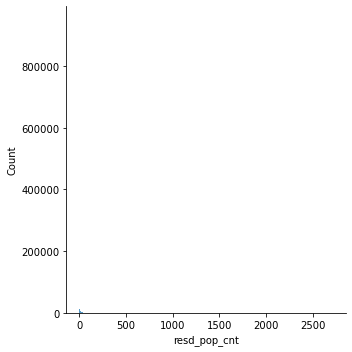

In [31]:
sns.displot(Fe['resd_pop_cnt']);
Fe['resd_pop_cnt'].max()

In [32]:
# 표준 스케일링 
Fe['resd_pop_scaled'] = scaler.fit_transform(Fe[['resd_pop_cnt']])
Fe[:2]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
503039,2018-02-01,1,CAN,제주시,50110250,한림읍,17.6751,0.0,0.0000,제주,02,2018,-0.038588
503040,2018-02-01,1,CHN,제주시,50110250,한림읍,633.2493,0.0,17.6005,제주,02,2018,6.513700


In [33]:
sorted_resd = Fe.sort_values(by = "resd_pop_scaled")
sorted_resd['resd_pop_scaled'][:10]

13839353   -0.226725
7347110    -0.226725
7347112    -0.226725
7347113    -0.226725
7347114    -0.226725
7347115    -0.226725
7347116    -0.226725
7347117    -0.226725
20966697   -0.226725
7347120    -0.226725
Name: resd_pop_scaled, dtype: float64

In [34]:
sorted_resd['resd_pop_scaled'][-10:]

505959    28.468492
567242    28.472824
551976    28.484735
569198    28.499952
520024    28.511892
522031    28.526862
617037    28.543774
551321    28.644127
520693    28.694825
521363    28.697837
Name: resd_pop_scaled, dtype: float64

In [35]:
Fe[Fe['resd_pop_scaled'] >= 6].shape

(6324, 13)

In [36]:
Fe = Fe[Fe['resd_pop_scaled'] < 6]
Fe.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
503039,2018-02-01,1,CAN,제주시,50110250,한림읍,17.6751,0.0000,0.0000,제주,02,2018,-0.038588
503041,2018-02-01,1,CHN,제주시,50110250,한림읍,0.0000,8.0926,52.8015,그외,02,2018,-0.226725
503042,2018-02-01,1,ETC,제주시,50110250,한림읍,17.9970,0.0000,2.6011,제주,02,2018,-0.035162
503043,2018-02-01,1,GBR,제주시,50110250,한림읍,0.0000,0.0000,3.3765,그외,02,2018,-0.226725
503044,2018-02-01,1,IDN,제주시,50110250,한림읍,113.5155,5.9554,69.0789,제주,02,2018,0.981555


In [37]:
Fe.shape

(2024737, 13)

2) IQR method

In [38]:
Fe1 = February.copy()

In [39]:
outlier_iqr(Fe1, 'resd_pop_cnt')

IQR은 13.7231 이다.
lower bound 값은 -20.58465 이다.
upper bound 값은 34.30775 이다.
총 이상치 개수는 245811 이다.


In [40]:
Fe1 = Fe1[(Fe1['resd_pop_cnt'] < upper) & (Fe1['work_pop_cnt'] > lower)]

In [41]:
Fe1.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year
503039,2018-02-01,1,CAN,제주시,50110250,한림읍,17.6751,0.0000,0.0000,제주,02,2018
503041,2018-02-01,1,CHN,제주시,50110250,한림읍,0.0000,8.0926,52.8015,그외,02,2018
503042,2018-02-01,1,ETC,제주시,50110250,한림읍,17.9970,0.0000,2.6011,제주,02,2018
503043,2018-02-01,1,GBR,제주시,50110250,한림읍,0.0000,0.0000,3.3765,그외,02,2018
503045,2018-02-01,1,IDN,제주시,50110250,한림읍,0.0000,5.9554,38.8569,그외,02,2018


In [42]:
Fe1.shape

(1785250, 12)

### 3월

1) scaling method

In [43]:
Mar = March.copy()

C:\Users\LEE RY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2639.2946

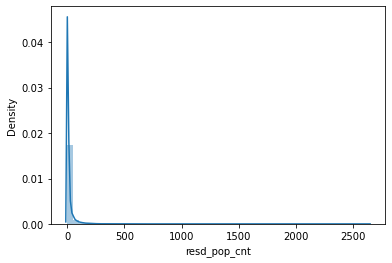

In [44]:
sns.distplot(Mar['resd_pop_cnt']);
Mar['resd_pop_cnt'].max()

In [45]:
# 표준 스케일링 
Mar['resd_pop_scaled'] = scaler.fit_transform(Mar[['resd_pop_cnt']])
Mar[:2]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
960404,2018-03-01,1,AUS,제주시,50110250,한림읍,0.0000,0.0,5.532,제주,03,2018,-0.226714
960405,2018-03-01,1,CAN,제주시,50110250,한림읍,11.2777,0.0,0.000,제주,03,2018,-0.100584


In [46]:
sorted_resd = Mar.sort_values(by = "resd_pop_scaled")
sorted_resd['resd_pop_scaled'][:10]

960404     -0.226714
14427298   -0.226714
14427296   -0.226714
14427294   -0.226714
14427292   -0.226714
14427290   -0.226714
14427287   -0.226714
14427285   -0.226714
14427284   -0.226714
14427282   -0.226714
Name: resd_pop_scaled, dtype: float64

In [47]:
sorted_resd['resd_pop_scaled'][-10:]

976637    28.711230
995873    28.793410
994495    28.875835
962679    28.935485
993809    28.961327
993121    29.042034
960724    29.109787
992433    29.123660
961372    29.198761
962025    29.291191
Name: resd_pop_scaled, dtype: float64

In [48]:
Mar[Mar['resd_pop_scaled'] >= 6].shape

(7926, 13)

In [49]:
Mar = Mar[Mar['resd_pop_scaled'] < 6]
Mar.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
960404,2018-03-01,1,AUS,제주시,50110250,한림읍,0.0000,0.0000,5.5320,제주,03,2018,-0.226714
960405,2018-03-01,1,CAN,제주시,50110250,한림읍,11.2777,0.0000,0.0000,제주,03,2018,-0.100584
960407,2018-03-01,1,CHN,제주시,50110250,한림읍,0.0000,15.9919,40.5774,그외,03,2018,-0.226714
960408,2018-03-01,1,ETC,제주시,50110250,한림읍,13.9785,0.0000,0.0000,제주,03,2018,-0.070379
960409,2018-03-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,2.5254,그외,03,2018,-0.226714


In [50]:
Mar.shape

(2251430, 13)

2) IQR method

In [51]:
Mar1 = March.copy()

In [52]:
outlier_iqr(Mar1, 'resd_pop_cnt')

IQR은 12.9916 이다.
lower bound 값은 -19.4874 이다.
upper bound 값은 32.479 이다.
총 이상치 개수는 276944 이다.


In [53]:
Mar1 = Mar1[(Mar1['resd_pop_cnt'] < upper) & (Mar1['work_pop_cnt'] > lower)]

In [54]:
Mar1.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year
960404,2018-03-01,1,AUS,제주시,50110250,한림읍,0.0000,0.0000,5.5320,제주,03,2018
960405,2018-03-01,1,CAN,제주시,50110250,한림읍,11.2777,0.0000,0.0000,제주,03,2018
960407,2018-03-01,1,CHN,제주시,50110250,한림읍,0.0000,15.9919,40.5774,그외,03,2018
960408,2018-03-01,1,ETC,제주시,50110250,한림읍,13.9785,0.0000,0.0000,제주,03,2018
960409,2018-03-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,2.5254,그외,03,2018


In [55]:
Mar1.shape

(1982412, 12)

### 4월

1) scaling method

In [56]:
Ap = April.copy()

2576.7749

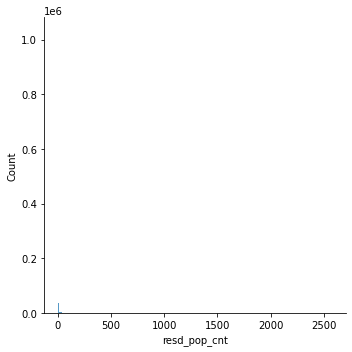

In [57]:
sns.displot(Ap['resd_pop_cnt']);
Ap['resd_pop_cnt'].max()

In [58]:
Ap['resd_pop_scaled'] = scaler.fit_transform(Ap[['resd_pop_cnt']])
Ap[:2]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
1476739,2018-04-01,1,CAN,제주시,50110250,한림읍,11.0951,0.0000,0.0000,제주,04,2018,-0.104855
1476740,2018-04-01,1,CHN,제주시,50110250,한림읍,502.7098,6.9597,30.2733,제주,04,2018,5.367041


In [59]:
Ap[Ap['resd_pop_scaled'] >= 6].shape

(7916, 13)

In [60]:
Ap = Ap[Ap['resd_pop_scaled'] < 6]
Ap.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
1476739,2018-04-01,1,CAN,제주시,50110250,한림읍,11.0951,0.0000,0.0000,제주,04,2018,-0.104855
1476740,2018-04-01,1,CHN,제주시,50110250,한림읍,502.7098,6.9597,30.2733,제주,04,2018,5.367041
1476741,2018-04-01,1,CHN,제주시,50110250,한림읍,0.0000,6.9597,50.4555,그외,04,2018,-0.228349
1476742,2018-04-01,1,ETC,제주시,50110250,한림읍,8.5205,0.0000,0.0000,제주,04,2018,-0.133512
1476743,2018-04-01,1,IDN,제주시,50110250,한림읍,190.7440,21.7295,31.5063,제주,04,2018,1.894719


In [61]:
Ap.shape

(2193280, 13)

2) IQR method

In [62]:
Ap1 = April.copy()

In [63]:
outlier_iqr(Ap1, 'resd_pop_cnt' )

IQR은 13.2726 이다.
lower bound 값은 -19.908900000000003 이다.
upper bound 값은 33.1815 이다.
총 이상치 개수는 267230 이다.


In [64]:
Ap1 = Ap1[(Ap1['resd_pop_cnt'] < upper) & (Ap1['work_pop_cnt'] > lower)]

In [65]:
Ap1.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year
1476739,2018-04-01,1,CAN,제주시,50110250,한림읍,11.0951,0.0000,0.0000,제주,04,2018
1476741,2018-04-01,1,CHN,제주시,50110250,한림읍,0.0000,6.9597,50.4555,그외,04,2018
1476742,2018-04-01,1,ETC,제주시,50110250,한림읍,8.5205,0.0000,0.0000,제주,04,2018
1476744,2018-04-01,1,IDN,제주시,50110250,한림읍,0.0000,32.5942,27.5680,그외,04,2018
1476745,2018-04-01,1,JPN,제주시,50110250,한림읍,6.3710,0.0000,0.0000,제주,04,2018


In [66]:
Ap1.shape

(1933966, 12)

### 5월 

1) scaling method

In [67]:
May1 = May.copy()

C:\Users\LEE RY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2494.3277

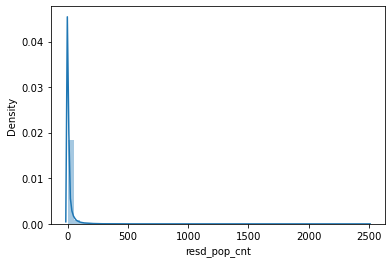

In [68]:
# 확률분포에서 찾기 (resd_pop_cnt)
sns.distplot(May1['resd_pop_cnt']);
May1['resd_pop_cnt'].max()

In [69]:
May1['resd_pop_scaled'] = scaler.fit_transform(May1[['resd_pop_cnt']])
May1[:2]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
1999453,2018-05-01,1,AUS,제주시,50110250,한림읍,0.0000,0.0,5.0351,제주,05,2018,-0.222518
1999454,2018-05-01,1,CAN,제주시,50110250,한림읍,10.7146,0.0,0.0000,제주,05,2018,-0.101486


In [70]:
May1 = May1[May1['resd_pop_scaled'] < 6]
May1.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
1999453,2018-05-01,1,AUS,제주시,50110250,한림읍,0.0000,0.0000,5.0351,제주,05,2018,-0.222518
1999454,2018-05-01,1,CAN,제주시,50110250,한림읍,10.7146,0.0000,0.0000,제주,05,2018,-0.101486
1999455,2018-05-01,1,CHN,제주시,50110250,한림읍,482.5806,20.0431,53.2787,제주,05,2018,5.228715
1999456,2018-05-01,1,CHN,제주시,50110250,한림읍,0.0000,20.0431,96.8704,그외,05,2018,-0.222518
1999457,2018-05-01,1,ETC,제주시,50110250,한림읍,20.3667,0.0000,0.0000,제주,05,2018,0.007544


In [71]:
May1.shape

(2317150, 13)

2) IQR method

In [72]:
May2 = May.copy()

In [73]:
outlier_iqr(May2, 'resd_pop_cnt')

IQR은 12.5532 이다.
lower bound 값은 -18.8298 이다.
upper bound 값은 31.383 이다.
총 이상치 개수는 287779 이다.


In [74]:
May2 = May2[(May2['resd_pop_cnt'] < upper) & (May2['work_pop_cnt'] > lower)]

In [75]:
May2.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year
1999453,2018-05-01,1,AUS,제주시,50110250,한림읍,0.0000,0.0000,5.0351,제주,05,2018
1999454,2018-05-01,1,CAN,제주시,50110250,한림읍,10.7146,0.0000,0.0000,제주,05,2018
1999456,2018-05-01,1,CHN,제주시,50110250,한림읍,0.0000,20.0431,96.8704,그외,05,2018
1999457,2018-05-01,1,ETC,제주시,50110250,한림읍,20.3667,0.0000,0.0000,제주,05,2018
1999458,2018-05-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,16.5576,그외,05,2018


In [76]:
May2.shape

(2037521, 12)

### 6월 

1) scaling method

In [77]:
Jun1 = Jun.copy()

C:\Users\LEE RY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2535.4675

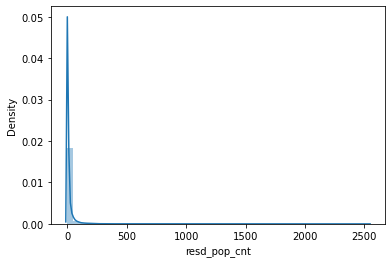

In [78]:
sns.distplot(Jun1['resd_pop_cnt']);
Jun1['resd_pop_cnt'].max()

In [79]:
Jun1['resd_pop_scaled'] = scaler.fit_transform(Jun1[['resd_pop_cnt']])
Jun1[:2]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
2538282,2018-06-01,1,CAN,제주시,50110250,한림읍,15.8985,0.0000,3.8297,제주,06,2018,-0.031334
2538283,2018-06-01,1,CHN,제주시,50110250,한림읍,484.6822,27.2185,19.7325,제주,06,2018,5.408526


In [80]:
Jun1 = Jun1[Jun1['resd_pop_scaled'] < 6]
Jun1.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
2538282,2018-06-01,1,CAN,제주시,50110250,한림읍,15.8985,0.0000,3.8297,제주,06,2018,-0.031334
2538283,2018-06-01,1,CHN,제주시,50110250,한림읍,484.6822,27.2185,19.7325,제주,06,2018,5.408526
2538284,2018-06-01,1,CHN,제주시,50110250,한림읍,0.0000,20.4139,9.8663,그외,06,2018,-0.215824
2538285,2018-06-01,1,ETC,제주시,50110250,한림읍,20.1775,0.0000,3.6453,제주,06,2018,0.018320
2538286,2018-06-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,1.8226,그외,06,2018,-0.215824


In [81]:
Jun1.shape

(2305573, 13)

2) IQR method

In [82]:
Jun2 = Jun.copy()

In [83]:
outlier_iqr(Jun2, 'resd_pop_cnt')

IQR은 12.0361 이다.
lower bound 값은 -18.05415 이다.
upper bound 값은 30.090249999999997 이다.
총 이상치 개수는 281272 이다.


In [84]:
Jun2 = Jun2[(Jun2['resd_pop_cnt'] < upper) & (Jun2['work_pop_cnt'] > lower)]

In [85]:
Jun2.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year
2538282,2018-06-01,1,CAN,제주시,50110250,한림읍,15.8985,0.0000,3.8297,제주,06,2018
2538284,2018-06-01,1,CHN,제주시,50110250,한림읍,0.0000,20.4139,9.8663,그외,06,2018
2538285,2018-06-01,1,ETC,제주시,50110250,한림읍,20.1775,0.0000,3.6453,제주,06,2018
2538286,2018-06-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,1.8226,그외,06,2018
2538287,2018-06-01,1,GBR,제주시,50110250,한림읍,0.0000,0.0000,2.7958,그외,06,2018


In [86]:
Jun2.shape

(2031914, 12)

### 7월 

1) scaling method

In [87]:
Jul = July.copy()

C:\Users\LEE RY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2665.0185

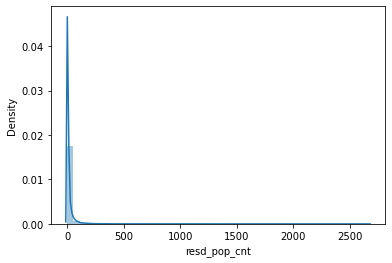

In [88]:
sns.distplot(Jul['resd_pop_cnt']);
Jul['resd_pop_cnt'].max()

In [89]:
Jul['resd_pop_scaled'] = scaler.fit_transform(Jul[['resd_pop_cnt']])
Jul[:2]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
3078058,2018-07-01,1,CAN,제주시,50110250,한림읍,5.5657,0.0,0.0000,제주,07,2018,-0.146571
3078059,2018-07-01,1,CHN,제주시,50110250,한림읍,414.0468,0.0,15.7478,제주,07,2018,4.522964


In [90]:
Jul = Jul[Jul['resd_pop_scaled'] < 6]
Jul.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
3078058,2018-07-01,1,CAN,제주시,50110250,한림읍,5.5657,0.0000,0.0000,제주,07,2018,-0.146571
3078059,2018-07-01,1,CHN,제주시,50110250,한림읍,414.0468,0.0000,15.7478,제주,07,2018,4.522964
3078060,2018-07-01,1,CHN,제주시,50110250,한림읍,0.0000,21.7221,26.2463,그외,07,2018,-0.210195
3078061,2018-07-01,1,ETC,제주시,50110250,한림읍,24.0137,0.0000,0.0000,제주,07,2018,0.064317
3078062,2018-07-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,5.7844,그외,07,2018,-0.210195


In [91]:
Jul.shape

(1763793, 13)

2) IQR method

In [92]:
Jul1 = July.copy()

In [93]:
outlier_iqr(Jul1, 'resd_pop_cnt')

IQR은 12.4309 이다.
lower bound 값은 -18.646349999999998 이다.
upper bound 값은 31.07725 이다.
총 이상치 개수는 209553 이다.


In [94]:
Jul1 = Jul1[(Jul1['resd_pop_cnt'] < upper) & (Jul1['work_pop_cnt'] > lower)]

In [95]:
Jul1.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year
3078058,2018-07-01,1,CAN,제주시,50110250,한림읍,5.5657,0.0000,0.0000,제주,07,2018
3078060,2018-07-01,1,CHN,제주시,50110250,한림읍,0.0000,21.7221,26.2463,그외,07,2018
3078061,2018-07-01,1,ETC,제주시,50110250,한림읍,24.0137,0.0000,0.0000,제주,07,2018
3078062,2018-07-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,5.7844,그외,07,2018
3078063,2018-07-01,1,GBR,제주시,50110250,한림읍,0.0000,0.0000,3.2071,그외,07,2018


In [96]:
Jul1.shape

(1559436, 12)

### 8월

1) scaling method

In [97]:
Au = August.copy()

C:\Users\LEE RY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2824.1568

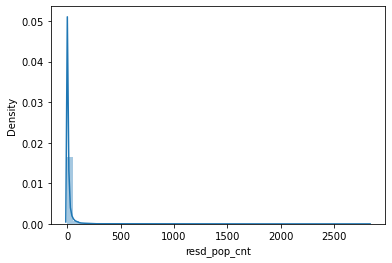

In [98]:
sns.distplot(Au['resd_pop_cnt']);
Au['resd_pop_cnt'].max()

In [99]:
Au['resd_pop_scaled'] = scaler.fit_transform(Au[['resd_pop_cnt']])
Au[:2]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
3634246,2018-08-01,1,CAN,제주시,50110250,한림읍,11.7867,0.0,0.0000,제주,08,2018,-0.072471
3634247,2018-08-01,1,CAN,제주시,50110250,한림읍,0.0000,0.0,4.2588,그외,08,2018,-0.208683


In [100]:
Au = Au[Au['resd_pop_scaled'] < 6]
Au.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
3634246,2018-08-01,1,CAN,제주시,50110250,한림읍,11.7867,0.0000,0.0000,제주,08,2018,-0.072471
3634247,2018-08-01,1,CAN,제주시,50110250,한림읍,0.0000,0.0000,4.2588,그외,08,2018,-0.208683
3634248,2018-08-01,1,CHN,제주시,50110250,한림읍,475.4782,7.6444,22.1678,제주,08,2018,5.286173
3634249,2018-08-01,1,CHN,제주시,50110250,한림읍,0.0000,38.2221,60.9615,그외,08,2018,-0.208683
3634250,2018-08-01,1,ETC,제주시,50110250,한림읍,21.8139,0.0000,3.9409,제주,08,2018,0.043409


In [101]:
Au.shape

(1820106, 13)

2) IQR method

In [102]:
Au1 = August.copy()

In [103]:
outlier_iqr(Au1, 'resd_pop_cnt')

IQR은 11.9484 이다.
lower bound 값은 -17.9226 이다.
upper bound 값은 29.871 이다.
총 이상치 개수는 220236 이다.


In [104]:
Au1 = Au1[(Au1['resd_pop_cnt'] < upper) & (Au1['work_pop_cnt'] > lower)]

In [105]:
Au1.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year
3634246,2018-08-01,1,CAN,제주시,50110250,한림읍,11.7867,0.0000,0.0000,제주,08,2018
3634247,2018-08-01,1,CAN,제주시,50110250,한림읍,0.0000,0.0000,4.2588,그외,08,2018
3634249,2018-08-01,1,CHN,제주시,50110250,한림읍,0.0000,38.2221,60.9615,그외,08,2018
3634250,2018-08-01,1,ETC,제주시,50110250,한림읍,21.8139,0.0000,3.9409,제주,08,2018
3634251,2018-08-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,9.8523,그외,08,2018


In [106]:
Au1.shape

(1604866, 12)

### 9월 

1) scaling method

In [107]:
Sep = September.copy()

C:\Users\LEE RY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2708.5292

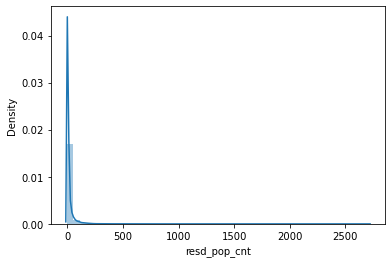

In [108]:
sns.distplot(Sep['resd_pop_cnt']);
Sep['resd_pop_cnt'].max()

In [109]:
Sep['resd_pop_scaled'] = scaler.fit_transform(Sep[['resd_pop_cnt']])
Sep[:2]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
4217702,2018-09-01,1,CAN,제주시,50110250,한림읍,5.4026,0.0,0.0000,제주,09,2018,-0.163557
4217703,2018-09-01,1,CAN,제주시,50110250,한림읍,0.0000,0.0,3.9042,그외,09,2018,-0.224440


In [110]:
Sep = Sep[Sep['resd_pop_scaled'] < 6]
Sep.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
4217702,2018-09-01,1,CAN,제주시,50110250,한림읍,5.4026,0.000,0.0000,제주,09,2018,-0.163557
4217703,2018-09-01,1,CAN,제주시,50110250,한림읍,0.0000,0.000,3.9042,그외,09,2018,-0.224440
4217705,2018-09-01,1,CHN,제주시,50110250,한림읍,0.0000,43.900,53.0434,그외,09,2018,-0.224440
4217706,2018-09-01,1,ETC,제주시,50110250,한림읍,18.3220,0.000,5.6744,제주,09,2018,-0.017966
4217707,2018-09-01,1,ETC,제주시,50110250,한림읍,0.0000,2.609,3.7829,그외,09,2018,-0.224440


In [111]:
Sep.shape

(1675856, 13)

2) IQR method

In [112]:
Sep1 = September.copy()

In [113]:
outlier_iqr(Sep1, 'resd_pop_cnt')

IQR은 12.7411 이다.
lower bound 값은 -19.111649999999997 이다.
upper bound 값은 31.852749999999997 이다.
총 이상치 개수는 210301 이다.


In [114]:
Sep1 = Sep1[(Sep1['resd_pop_cnt'] < upper) & (Sep1['work_pop_cnt'] > lower)]

In [115]:
Sep1.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year
4217702,2018-09-01,1,CAN,제주시,50110250,한림읍,5.4026,0.000,0.0000,제주,09,2018
4217703,2018-09-01,1,CAN,제주시,50110250,한림읍,0.0000,0.000,3.9042,그외,09,2018
4217705,2018-09-01,1,CHN,제주시,50110250,한림읍,0.0000,43.900,53.0434,그외,09,2018
4217706,2018-09-01,1,ETC,제주시,50110250,한림읍,18.3220,0.000,5.6744,제주,09,2018
4217707,2018-09-01,1,ETC,제주시,50110250,한림읍,0.0000,2.609,3.7829,그외,09,2018


In [116]:
Sep1.shape

(1470982, 12)

### 10월 

1) scaling method

In [117]:
Oct = October.copy()

C:\Users\LEE RY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2714.9847

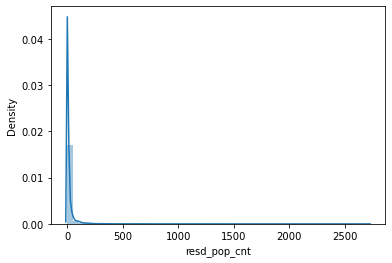

In [118]:
sns.distplot(Oct['resd_pop_cnt']);
Oct['resd_pop_cnt'].max()

In [119]:
Oct['resd_pop_scaled'] = scaler.fit_transform(Oct[['resd_pop_cnt']])
Oct[:2]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
4771973,2018-10-01,1,BGD,제주시,50110250,한림읍,12.3597,0.0,0.0,제주,10,2018,-0.087017
4771974,2018-10-01,1,CAN,제주시,50110250,한림읍,5.4168,0.0,0.0,제주,10,2018,-0.165814


In [120]:
Oct = Oct[Oct['resd_pop_scaled'] < 6]
Oct.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
4771973,2018-10-01,1,BGD,제주시,50110250,한림읍,12.3597,0.0000,0.0000,제주,10,2018,-0.087017
4771974,2018-10-01,1,CAN,제주시,50110250,한림읍,5.4168,0.0000,0.0000,제주,10,2018,-0.165814
4771976,2018-10-01,1,CHN,제주시,50110250,한림읍,0.0000,35.7554,51.8429,그외,10,2018,-0.227291
4771977,2018-10-01,1,ETC,제주시,50110250,한림읍,16.6274,0.0000,1.7165,제주,10,2018,-0.038582
4771978,2018-10-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,8.5826,그외,10,2018,-0.227291


In [121]:
Oct.shape

(1739960, 13)

2) IQR method

In [122]:
Oct1 = October.copy()

In [123]:
outlier_iqr(Oct1, 'resd_pop_cnt')

IQR은 13.1087 이다.
lower bound 값은 -19.663050000000002 이다.
upper bound 값은 32.771750000000004 이다.
총 이상치 개수는 213288 이다.


In [124]:
Oct1 = Oct1[(Oct1['resd_pop_cnt'] < upper) & (Oct1['work_pop_cnt'] > lower)]

In [125]:
Oct1.head( )

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year
4771973,2018-10-01,1,BGD,제주시,50110250,한림읍,12.3597,0.0000,0.0000,제주,10,2018
4771974,2018-10-01,1,CAN,제주시,50110250,한림읍,5.4168,0.0000,0.0000,제주,10,2018
4771976,2018-10-01,1,CHN,제주시,50110250,한림읍,0.0000,35.7554,51.8429,그외,10,2018
4771977,2018-10-01,1,ETC,제주시,50110250,한림읍,16.6274,0.0000,1.7165,제주,10,2018
4771978,2018-10-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,8.5826,그외,10,2018


In [126]:
Oct1.shape

(1532882, 12)

### 11월

1) scaling method

In [127]:
Nov = November.copy()

C:\Users\LEE RY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2745.634

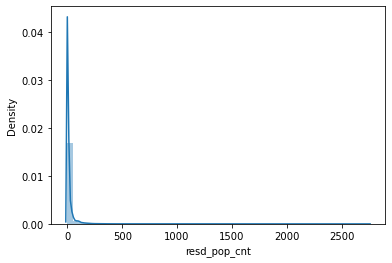

In [128]:
sns.distplot(Nov['resd_pop_cnt']);
Nov['resd_pop_cnt'].max()

In [129]:
Nov['resd_pop_scaled'] = scaler.fit_transform(Nov[['resd_pop_cnt']])
Nov[:2]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
5325545,2018-11-01,1,BGD,제주시,50110250,한림읍,12.4715,0.0,0.0,제주,11,2018,-0.084733
5325546,2018-11-01,1,CAN,제주시,50110250,한림읍,5.2501,0.0,0.0,제주,11,2018,-0.164891


In [130]:
Nov = Nov[Nov['resd_pop_scaled'] < 6]
Nov.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
5325545,2018-11-01,1,BGD,제주시,50110250,한림읍,12.4715,0.0000,0.0000,제주,11,2018,-0.084733
5325546,2018-11-01,1,CAN,제주시,50110250,한림읍,5.2501,0.0000,0.0000,제주,11,2018,-0.164891
5325547,2018-11-01,1,CHN,제주시,50110250,한림읍,485.0850,6.9076,15.0233,제주,11,2018,5.161359
5325548,2018-11-01,1,CHN,제주시,50110250,한림읍,0.0000,27.6303,25.0388,그외,11,2018,-0.223168
5325549,2018-11-01,1,ETC,제주시,50110250,한림읍,21.2475,0.0000,1.5354,제주,11,2018,0.012683


In [131]:
Nov.shape

(1704891, 13)

2) IQR method

In [132]:
Nov1 = November.copy()

In [133]:
outlier_iqr(Nov1, 'resd_pop_cnt')

IQR은 13.0786 이다.
lower bound 값은 -19.6179 이다.
upper bound 값은 32.6965 이다.
총 이상치 개수는 208316 이다.


In [134]:
Nov1 = Nov1[(Nov1['resd_pop_cnt'] < upper) & (Nov1['work_pop_cnt'] > lower)]

In [135]:
Nov1.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year
5325545,2018-11-01,1,BGD,제주시,50110250,한림읍,12.4715,0.0000,0.0000,제주,11,2018
5325546,2018-11-01,1,CAN,제주시,50110250,한림읍,5.2501,0.0000,0.0000,제주,11,2018
5325548,2018-11-01,1,CHN,제주시,50110250,한림읍,0.0000,27.6303,25.0388,그외,11,2018
5325549,2018-11-01,1,ETC,제주시,50110250,한림읍,21.2475,0.0000,1.5354,제주,11,2018
5325550,2018-11-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,3.0709,그외,11,2018


In [136]:
Nov1.shape

(1502756, 12)

### 12월 

1) scaling method

In [137]:
Dec = December.copy()

C:\Users\LEE RY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2678.101

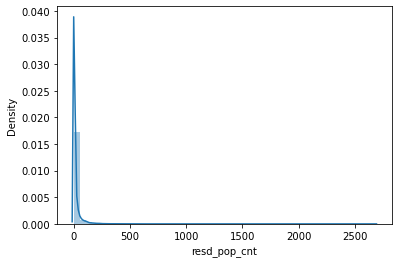

In [138]:
sns.distplot(Dec['resd_pop_cnt']);
Dec['resd_pop_cnt'].max()

In [139]:
Dec['resd_pop_scaled'] = scaler.fit_transform(Dec[['resd_pop_cnt']])
Dec[:2]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
5869418,2018-12-01,1,BGD,제주시,50110250,한림읍,6.2422,0.0,0.0,제주,12,2018,-0.152733
5869419,2018-12-01,1,CAN,제주시,50110250,한림읍,10.4551,0.0,0.0,제주,12,2018,-0.107482


In [140]:
Dec = Dec[Dec['resd_pop_scaled'] < 6]
Dec.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled
5869418,2018-12-01,1,BGD,제주시,50110250,한림읍,6.2422,0.0000,0.0000,제주,12,2018,-0.152733
5869419,2018-12-01,1,CAN,제주시,50110250,한림읍,10.4551,0.0000,0.0000,제주,12,2018,-0.107482
5869420,2018-12-01,1,CAN,제주시,50110250,한림읍,0.0000,0.0000,3.7776,그외,12,2018,-0.219782
5869421,2018-12-01,1,CHN,제주시,50110250,한림읍,484.3864,7.1005,20.5905,제주,12,2018,4.983105
5869422,2018-12-01,1,CHN,제주시,50110250,한림읍,0.0000,28.4020,15.4429,그외,12,2018,-0.219782


In [141]:
Dec.shape

(1739963, 13)

2) IQR method

In [142]:
Dec1 = December.copy()

In [143]:
outlier_iqr(Dec1, 'resd_pop_cnt')

IQR은 13.1162 이다.
lower bound 값은 -19.6743 이다.
upper bound 값은 32.790499999999994 이다.
총 이상치 개수는 215979 이다.


In [144]:
Dec1 = Dec1[(Dec1['resd_pop_cnt'] < upper) & (Dec1['work_pop_cnt'] > lower)]

In [145]:
Dec1.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year
5869418,2018-12-01,1,BGD,제주시,50110250,한림읍,6.2422,0.000,0.0000,제주,12,2018
5869419,2018-12-01,1,CAN,제주시,50110250,한림읍,10.4551,0.000,0.0000,제주,12,2018
5869420,2018-12-01,1,CAN,제주시,50110250,한림읍,0.0000,0.000,3.7776,그외,12,2018
5869422,2018-12-01,1,CHN,제주시,50110250,한림읍,0.0000,28.402,15.4429,그외,12,2018
5869423,2018-12-01,1,ETC,제주시,50110250,한림읍,13.4460,0.000,2.4292,제주,12,2018


In [146]:
Dec.shape

(1739963, 13)

### 스케일링 

1) scaling method ver.

In [147]:
Jan[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Jan[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Jan[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주,01,2018,-0.155972,-0.238693,-0.296630,-0.282461
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주,01,2018,4.407695,9.769432,-0.296630,-0.240618
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외,01,2018,-0.222349,-0.384257,0.995489,1.457061
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외,01,2018,-0.222349,-0.384257,-0.296630,-0.147449
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주,01,2018,-0.055641,-0.018667,-0.296630,-0.345858


In [148]:
Fe[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Fe[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Fe[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
503039,2018-02-01,1,CAN,제주시,50110250,한림읍,17.6751,0.0000,0.0000,제주,02,2018,-0.038588,0.014916,-0.288433,-0.468086
503041,2018-02-01,1,CHN,제주시,50110250,한림읍,0.0000,8.0926,52.8015,그외,02,2018,-0.226725,-0.380127,1.068401,1.676663
503042,2018-02-01,1,ETC,제주시,50110250,한림읍,17.9970,0.0000,2.6011,제주,02,2018,-0.035162,0.022111,-0.288433,-0.362432
503043,2018-02-01,1,GBR,제주시,50110250,한림읍,0.0000,0.0000,3.3765,그외,02,2018,-0.226725,-0.380127,-0.288433,-0.330936
503044,2018-02-01,1,IDN,제주시,50110250,한림읍,113.5155,5.9554,69.0789,제주,02,2018,0.981555,2.156978,0.710071,2.337837


In [149]:
Mar[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Mar[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Mar[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
960404,2018-03-01,1,AUS,제주시,50110250,한림읍,0.0000,0.0000,5.5320,제주,03,2018,-0.226714,-0.382085,-0.298143,-0.242200
960405,2018-03-01,1,CAN,제주시,50110250,한림읍,11.2777,0.0000,0.0000,제주,03,2018,-0.100584,-0.111464,-0.298143,-0.428683
960407,2018-03-01,1,CHN,제주시,50110250,한림읍,0.0000,15.9919,40.5774,그외,03,2018,-0.226714,-0.382085,2.588518,0.939180
960408,2018-03-01,1,ETC,제주시,50110250,한림읍,13.9785,0.0000,0.0000,제주,03,2018,-0.070379,-0.046655,-0.298143,-0.428683
960409,2018-03-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,2.5254,그외,03,2018,-0.226714,-0.382085,-0.298143,-0.343552


In [150]:
Ap[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Ap[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Ap[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
1476739,2018-04-01,1,CAN,제주시,50110250,한림읍,11.0951,0.0000,0.0000,제주,04,2018,-0.104855,-0.119425,-0.284541,-0.469036
1476740,2018-04-01,1,CHN,제주시,50110250,한림읍,502.7098,6.9597,30.2733,제주,04,2018,5.367041,11.686527,0.915328,0.777745
1476741,2018-04-01,1,CHN,제주시,50110250,한림읍,0.0000,6.9597,50.4555,그외,04,2018,-0.228349,-0.385870,0.915328,1.608933
1476742,2018-04-01,1,ETC,제주시,50110250,한림읍,8.5205,0.0000,0.0000,제주,04,2018,-0.133512,-0.181253,-0.284541,-0.469036
1476743,2018-04-01,1,IDN,제주시,50110250,한림읍,190.7440,21.7295,31.5063,제주,04,2018,1.894719,4.194779,3.461676,0.828526


In [151]:
May1[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(May1[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
May1[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
1999453,2018-05-01,1,AUS,제주시,50110250,한림읍,0.0000,0.0000,5.0351,제주,05,2018,-0.222518,-0.376064,-0.281061,-0.240519
1999454,2018-05-01,1,CAN,제주시,50110250,한림읍,10.7146,0.0000,0.0000,제주,05,2018,-0.101486,-0.113654,-0.281061,-0.464911
1999455,2018-05-01,1,CHN,제주시,50110250,한림읍,482.5806,20.0431,53.2787,제주,05,2018,5.228715,11.442772,3.508113,1.909481
1999456,2018-05-01,1,CHN,제주시,50110250,한림읍,0.0000,20.0431,96.8704,그외,05,2018,-0.222518,-0.376064,3.508113,3.852167
1999457,2018-05-01,1,ETC,제주시,50110250,한림읍,20.3667,0.0000,0.0000,제주,05,2018,0.007544,0.122735,-0.281061,-0.464911


In [152]:
Jun1[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Jun1[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Jun1[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
2538282,2018-06-01,1,CAN,제주시,50110250,한림읍,15.8985,0.0000,3.8297,제주,06,2018,-0.031334,0.036365,-0.286553,-0.292027
2538283,2018-06-01,1,CHN,제주시,50110250,한림읍,484.6822,27.2185,19.7325,제주,06,2018,5.408526,12.109882,5.163019,0.392245
2538284,2018-06-01,1,CHN,제주시,50110250,한림읍,0.0000,20.4139,9.8663,그외,06,2018,-0.215824,-0.373101,3.800631,-0.032282
2538285,2018-06-01,1,ETC,제주시,50110250,한림읍,20.1775,0.0000,3.6453,제주,06,2018,0.018320,0.146570,-0.286553,-0.299961
2538286,2018-06-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,1.8226,그외,06,2018,-0.215824,-0.373101,-0.286553,-0.378389


In [153]:
Jul[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Jul[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Jul[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
3078058,2018-07-01,1,CAN,제주시,50110250,한림읍,5.5657,0.0000,0.0000,제주,07,2018,-0.146571,-0.232910,-0.303151,-0.457083
3078059,2018-07-01,1,CHN,제주시,50110250,한림읍,414.0468,0.0000,15.7478,제주,07,2018,4.522964,10.534973,-0.303151,0.180700
3078060,2018-07-01,1,CHN,제주시,50110250,한림읍,0.0000,21.7221,26.2463,그외,07,2018,-0.210195,-0.379626,4.083358,0.605887
3078061,2018-07-01,1,ETC,제주시,50110250,한림읍,24.0137,0.0000,0.0000,제주,07,2018,0.064317,0.253394,-0.303151,-0.457083
3078062,2018-07-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,5.7844,그외,07,2018,-0.210195,-0.379626,-0.303151,-0.222816


In [154]:
Au[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Au[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Au[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
3634246,2018-08-01,1,CAN,제주시,50110250,한림읍,11.7867,0.0000,0.0000,제주,08,2018,-0.072471,-0.065184,-0.298005,-0.436175
3634247,2018-08-01,1,CAN,제주시,50110250,한림읍,0.0000,0.0000,4.2588,그외,08,2018,-0.208683,-0.373026,-0.298005,-0.287900
3634248,2018-08-01,1,CHN,제주시,50110250,한림읍,475.4782,7.6444,22.1678,제주,08,2018,5.286173,12.045407,1.231435,0.335623
3634249,2018-08-01,1,CHN,제주시,50110250,한림읍,0.0000,38.2221,60.9615,그외,08,2018,-0.208683,-0.373026,7.349218,1.686272
3634250,2018-08-01,1,ETC,제주시,50110250,한림읍,21.8139,0.0000,3.9409,제주,08,2018,0.043409,0.196704,-0.298005,-0.298968


In [155]:
Sep[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Sep[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Sep[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
4217702,2018-09-01,1,CAN,제주시,50110250,한림읍,5.4026,0.000,0.0000,제주,09,2018,-0.163557,-0.248617,-0.297633,-0.459404
4217703,2018-09-01,1,CAN,제주시,50110250,한림읍,0.0000,0.000,3.9042,그외,09,2018,-0.224440,-0.377593,-0.297633,-0.302705
4217705,2018-09-01,1,CHN,제주시,50110250,한림읍,0.0000,43.900,53.0434,그외,09,2018,-0.224440,-0.377593,7.571289,1.669547
4217706,2018-09-01,1,ETC,제주시,50110250,한림읍,18.3220,0.000,5.6744,제주,09,2018,-0.017966,0.059806,-0.297633,-0.231656
4217707,2018-09-01,1,ETC,제주시,50110250,한림읍,0.0000,2.609,3.7829,그외,09,2018,-0.224440,-0.377593,0.170021,-0.307573


In [156]:
Oct[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Oct[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Oct[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
4771973,2018-10-01,1,BGD,제주시,50110250,한림읍,12.3597,0.0000,0.0000,제주,10,2018,-0.087017,-0.083533,-0.289529,-0.444433
4771974,2018-10-01,1,CAN,제주시,50110250,한림읍,5.4168,0.0000,0.0000,제주,10,2018,-0.165814,-0.253833,-0.289529,-0.444433
4771976,2018-10-01,1,CHN,제주시,50110250,한림읍,0.0000,35.7554,51.8429,그외,10,2018,-0.227291,-0.386700,6.211253,1.632351
4771977,2018-10-01,1,ETC,제주시,50110250,한림읍,16.6274,0.0000,1.7165,제주,10,2018,-0.038582,0.021148,-0.289529,-0.375671
4771978,2018-10-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,8.5826,그외,10,2018,-0.227291,-0.386700,-0.289529,-0.100621


In [157]:
Nov[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Nov[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Nov[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
5325545,2018-11-01,1,BGD,제주시,50110250,한림읍,12.4715,0.0000,0.0000,제주,11,2018,-0.084733,-0.078257,-0.289166,-0.446063
5325546,2018-11-01,1,CAN,제주시,50110250,한림읍,5.2501,0.0000,0.0000,제주,11,2018,-0.164891,-0.255391,-0.289166,-0.446063
5325547,2018-11-01,1,CHN,제주시,50110250,한림읍,485.0850,6.9076,15.0233,제주,11,2018,5.161359,11.514495,0.900403,0.167335
5325548,2018-11-01,1,CHN,제주시,50110250,한림읍,0.0000,27.6303,25.0388,그외,11,2018,-0.223168,-0.384171,4.469094,0.576266
5325549,2018-11-01,1,ETC,제주시,50110250,한림읍,21.2475,0.0000,1.5354,제주,11,2018,0.012683,0.137009,-0.289166,-0.383373


In [158]:
Dec[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Dec[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Dec[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
5869418,2018-12-01,1,BGD,제주시,50110250,한림읍,6.2422,0.0000,0.0000,제주,12,2018,-0.152733,-0.235691,-0.289650,-0.427481
5869419,2018-12-01,1,CAN,제주시,50110250,한림읍,10.4551,0.0000,0.0000,제주,12,2018,-0.107482,-0.133171,-0.289650,-0.427481
5869420,2018-12-01,1,CAN,제주시,50110250,한림읍,0.0000,0.0000,3.7776,그외,12,2018,-0.219782,-0.387593,-0.289650,-0.288852
5869421,2018-12-01,1,CHN,제주시,50110250,한림읍,484.3864,7.1005,20.5905,제주,12,2018,4.983105,11.399800,0.988008,0.328139
5869422,2018-12-01,1,CHN,제주시,50110250,한림읍,0.0000,28.4020,15.4429,그외,12,2018,-0.219782,-0.387593,4.820983,0.139235


2) IQR method ver.

In [159]:
Jan1[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Jan1[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Jan1[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_sc,work_pop_sc,visit_pop_sc
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주,01,2018,0.098119,-0.286743,-0.226811
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외,01,2018,-0.699469,1.602907,1.718632
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외,01,2018,-0.699469,-0.286743,-0.075817
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주,01,2018,1.303707,-0.286743,-0.297713
5,2018-01-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,5.7517,그외,01,2018,-0.699469,-0.286743,-0.178077


In [160]:
Fe1[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Fe1[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Fe1[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_sc,work_pop_sc,visit_pop_sc
503039,2018-02-01,1,CAN,제주시,50110250,한림읍,17.6751,0.0000,0.0000,제주,02,2018,1.531559,-0.304512,-0.446959
503041,2018-02-01,1,CHN,제주시,50110250,한림읍,0.0000,8.0926,52.8015,그외,02,2018,-0.696947,1.881674,2.091223
503042,2018-02-01,1,ETC,제주시,50110250,한림읍,17.9970,0.0000,2.6011,제주,02,2018,1.572145,-0.304512,-0.321923
503043,2018-02-01,1,GBR,제주시,50110250,한림읍,0.0000,0.0000,3.3765,그외,02,2018,-0.696947,-0.304512,-0.284649
503045,2018-02-01,1,IDN,제주시,50110250,한림읍,0.0000,5.9554,38.8569,그외,02,2018,-0.696947,1.304318,1.420902


In [161]:
Mar1[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Mar1[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Mar1[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_sc,work_pop_sc,visit_pop_sc
960404,2018-03-01,1,AUS,제주시,50110250,한림읍,0.0000,0.0000,5.5320,제주,03,2018,-0.695807,-0.304762,-0.192166
960405,2018-03-01,1,CAN,제주시,50110250,한림읍,11.2777,0.0000,0.0000,제주,03,2018,0.815322,-0.304762,-0.391175
960407,2018-03-01,1,CHN,제주시,50110250,한림읍,0.0000,15.9919,40.5774,그외,03,2018,-0.695807,4.149278,1.068566
960408,2018-03-01,1,ETC,제주시,50110250,한림읍,13.9785,0.0000,0.0000,제주,03,2018,1.177209,-0.304762,-0.391175
960409,2018-03-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,2.5254,그외,03,2018,-0.695807,-0.304762,-0.300326


In [162]:
Ap1[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Ap1[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Ap1[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_sc,work_pop_sc,visit_pop_sc
1476739,2018-04-01,1,CAN,제주시,50110250,한림읍,11.0951,0.0000,0.0000,제주,04,2018,0.758456,-0.296570,-0.444940
1476741,2018-04-01,1,CHN,제주시,50110250,한림읍,0.0000,6.9597,50.4555,그외,04,2018,-0.692917,1.664489,1.988578
1476742,2018-04-01,1,ETC,제주시,50110250,한림읍,8.5205,0.0000,0.0000,제주,04,2018,0.421667,-0.296570,-0.444940
1476744,2018-04-01,1,IDN,제주시,50110250,한림읍,0.0000,32.5942,27.5680,그외,04,2018,-0.692917,8.887612,0.884692
1476745,2018-04-01,1,JPN,제주시,50110250,한림읍,6.3710,0.0000,0.0000,제주,04,2018,0.140487,-0.296570,-0.444940


In [163]:
May2[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(May2[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
May2[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_sc,work_pop_sc,visit_pop_sc
1999453,2018-05-01,1,AUS,제주시,50110250,한림읍,0.0000,0.0000,5.0351,제주,05,2018,-0.674069,-0.303719,-0.176142
1999454,2018-05-01,1,CAN,제주시,50110250,한림읍,10.7146,0.0000,0.0000,제주,05,2018,0.815147,-0.303719,-0.443120
1999456,2018-05-01,1,CHN,제주시,50110250,한림읍,0.0000,20.0431,96.8704,그외,05,2018,-0.674069,6.354418,4.693265
1999457,2018-05-01,1,ETC,제주시,50110250,한림읍,20.3667,0.0000,0.0000,제주,05,2018,2.156686,-0.303719,-0.443120
1999458,2018-05-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,16.5576,그외,05,2018,-0.674069,-0.303719,0.434818


In [164]:
Jun2[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Jun2[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Jun2[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_sc,work_pop_sc,visit_pop_sc
2538282,2018-06-01,1,CAN,제주시,50110250,한림읍,15.8985,0.0000,3.8297,제주,06,2018,1.645450,-0.286025,-0.238012
2538284,2018-06-01,1,CHN,제주시,50110250,한림읍,0.0000,20.4139,9.8663,그외,06,2018,-0.658348,6.215081,0.047342
2538285,2018-06-01,1,ETC,제주시,50110250,한림읍,20.1775,0.0000,3.6453,제주,06,2018,2.265506,-0.286025,-0.246729
2538286,2018-06-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,1.8226,그외,06,2018,-0.658348,-0.286025,-0.332889
2538287,2018-06-01,1,GBR,제주시,50110250,한림읍,0.0000,0.0000,2.7958,그외,06,2018,-0.658348,-0.286025,-0.286885


In [165]:
Jul1[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Jul1[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Jul1[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_sc,work_pop_sc,visit_pop_sc
3078058,2018-07-01,1,CAN,제주시,50110250,한림읍,5.5657,0.0000,0.0000,제주,07,2018,0.131143,-0.302276,-0.417762
3078060,2018-07-01,1,CHN,제주시,50110250,한림읍,0.0000,21.7221,26.2463,그외,07,2018,-0.649129,6.106136,0.704107
3078061,2018-07-01,1,ETC,제주시,50110250,한림읍,24.0137,0.0000,0.0000,제주,07,2018,2.717424,-0.302276,-0.417762
3078062,2018-07-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,5.7844,그외,07,2018,-0.649129,-0.302276,-0.170514
3078063,2018-07-01,1,GBR,제주시,50110250,한림읍,0.0000,0.0000,3.2071,그외,07,2018,-0.649129,-0.302276,-0.280678


In [166]:
Au1[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Au1[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Au1[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_sc,work_pop_sc,visit_pop_sc
3634246,2018-08-01,1,CAN,제주시,50110250,한림읍,11.7867,0.0000,0.0000,제주,08,2018,1.080755,-0.295869,-0.396300
3634247,2018-08-01,1,CAN,제주시,50110250,한림읍,0.0000,0.0000,4.2588,그외,08,2018,-0.642578,-0.295869,-0.243661
3634249,2018-08-01,1,CHN,제주시,50110250,한림읍,0.0000,38.2221,60.9615,그외,08,2018,-0.642578,11.111528,1.788612
3634250,2018-08-01,1,ETC,제주시,50110250,한림읍,21.8139,0.0000,3.9409,제주,08,2018,2.546831,-0.295869,-0.255055
3634251,2018-08-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,9.8523,그외,08,2018,-0.642578,-0.295869,-0.043186


In [167]:
Sep1[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Sep1[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Sep1[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_sc,work_pop_sc,visit_pop_sc
4217702,2018-09-01,1,CAN,제주시,50110250,한림읍,5.4026,0.000,0.0000,제주,09,2018,0.070299,-0.297843,-0.420739
4217703,2018-09-01,1,CAN,제주시,50110250,한림읍,0.0000,0.000,3.9042,그외,09,2018,-0.666526,-0.297843,-0.249633
4217705,2018-09-01,1,CHN,제주시,50110250,한림읍,0.0000,43.900,53.0434,그외,09,2018,-0.666526,11.794377,1.903945
4217706,2018-09-01,1,ETC,제주시,50110250,한림읍,18.3220,0.000,5.6744,제주,09,2018,1.832291,-0.297843,-0.172052
4217707,2018-09-01,1,ETC,제주시,50110250,한림읍,0.0000,2.609,3.7829,그외,09,2018,-0.666526,0.420804,-0.254949


In [168]:
Oct1[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Oct1[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Oct1[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_sc,work_pop_sc,visit_pop_sc
4771973,2018-10-01,1,BGD,제주시,50110250,한림읍,12.3597,0.0000,0.0000,제주,10,2018,0.950105,-0.271282,-0.409320
4771974,2018-10-01,1,CAN,제주시,50110250,한림읍,5.4168,0.0000,0.0000,제주,10,2018,0.037524,-0.271282,-0.409320
4771976,2018-10-01,1,CHN,제주시,50110250,한림읍,0.0000,35.7554,51.8429,그외,10,2018,-0.674465,9.297723,1.901096
4771977,2018-10-01,1,ETC,제주시,50110250,한림읍,16.6274,0.0000,1.7165,제주,10,2018,1.511055,-0.271282,-0.332823
4771978,2018-10-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,8.5826,그외,10,2018,-0.674465,-0.271282,-0.026830


In [169]:
Nov1[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Nov1[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Nov1[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_sc,work_pop_sc,visit_pop_sc
5325545,2018-11-01,1,BGD,제주시,50110250,한림읍,12.4715,0.0000,0.0000,제주,11,2018,0.978121,-0.276438,-0.411680
5325546,2018-11-01,1,CAN,제주시,50110250,한림읍,5.2501,0.0000,0.0000,제주,11,2018,0.019389,-0.276438,-0.411680
5325548,2018-11-01,1,CHN,제주시,50110250,한림읍,0.0000,27.6303,25.0388,그외,11,2018,-0.677628,6.560189,0.732431
5325549,2018-11-01,1,ETC,제주시,50110250,한림읍,21.2475,0.0000,1.5354,제주,11,2018,2.143246,-0.276438,-0.341522
5325550,2018-11-01,1,ETC,제주시,50110250,한림읍,0.0000,0.0000,3.0709,그외,11,2018,-0.677628,-0.276438,-0.271360


In [170]:
Dec1[['resd_pop_sc', 'work_pop_sc', 'visit_pop_sc']] = scaler.fit_transform(Dec1[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']])
Dec1[:5]

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,Month,Year,resd_pop_sc,work_pop_sc,visit_pop_sc
5869418,2018-12-01,1,BGD,제주시,50110250,한림읍,6.2422,0.000,0.0000,제주,12,2018,0.153719,-0.272918,-0.383464
5869419,2018-12-01,1,CAN,제주시,50110250,한림읍,10.4551,0.000,0.0000,제주,12,2018,0.722386,-0.272918,-0.383464
5869420,2018-12-01,1,CAN,제주시,50110250,한림읍,0.0000,0.000,3.7776,그외,12,2018,-0.688867,-0.272918,-0.235126
5869422,2018-12-01,1,CHN,제주시,50110250,한림읍,0.0000,28.402,15.4429,그외,12,2018,-0.688867,7.157440,0.222945
5869423,2018-12-01,1,ETC,제주시,50110250,한림읍,13.4460,0.000,2.4292,제주,12,2018,1.126104,-0.272918,-0.288074


### 상관계수 

1) 

In [171]:
Jan.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.003942,-0.031533,0.027206,0.035048,-0.031533,-0.031533,0.027206,0.035048
emd_cd,-0.003942,1.000000,0.004432,-0.004099,0.007351,0.004432,0.004432,-0.004099,0.007351
resd_pop_cnt,-0.031533,0.004432,1.000000,0.410012,0.269503,1.000000,1.000000,0.410012,0.269503
work_pop_cnt,0.027206,-0.004099,0.410012,1.000000,0.490407,0.410012,0.410012,1.000000,0.490407
visit_pop_cnt,0.035048,0.007351,0.269503,0.490407,1.000000,0.269503,0.269503,0.490407,1.000000
resd_pop_scaled,-0.031533,0.004432,1.000000,0.410012,0.269503,1.000000,1.000000,0.410012,0.269503
resd_pop_sc,-0.031533,0.004432,1.000000,0.410012,0.269503,1.000000,1.000000,0.410012,0.269503
work_pop_sc,0.027206,-0.004099,0.410012,1.000000,0.490407,0.410012,0.410012,1.000000,0.490407
visit_pop_sc,0.035048,0.007351,0.269503,0.490407,1.000000,0.269503,0.269503,0.490407,1.000000


In [172]:
Fe.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.004058,-0.031523,0.023645,0.038859,-0.031523,-0.031523,0.023645,0.038859
emd_cd,-0.004058,1.000000,0.010696,0.000147,0.001593,0.010696,0.010696,0.000147,0.001593
resd_pop_cnt,-0.031523,0.010696,1.000000,0.430606,0.315665,1.000000,1.000000,0.430606,0.315665
work_pop_cnt,0.023645,0.000147,0.430606,1.000000,0.481316,0.430606,0.430606,1.000000,0.481316
visit_pop_cnt,0.038859,0.001593,0.315665,0.481316,1.000000,0.315665,0.315665,0.481316,1.000000
resd_pop_scaled,-0.031523,0.010696,1.000000,0.430606,0.315665,1.000000,1.000000,0.430606,0.315665
resd_pop_sc,-0.031523,0.010696,1.000000,0.430606,0.315665,1.000000,1.000000,0.430606,0.315665
work_pop_sc,0.023645,0.000147,0.430606,1.000000,0.481316,0.430606,0.430606,1.000000,0.481316
visit_pop_sc,0.038859,0.001593,0.315665,0.481316,1.000000,0.315665,0.315665,0.481316,1.000000


In [173]:
Mar.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.003084,-0.033668,0.027332,0.031612,-0.033668,-0.033668,0.027332,0.031612
emd_cd,-0.003084,1.000000,0.011394,0.001008,-0.000170,0.011394,0.011394,0.001008,-0.000170
resd_pop_cnt,-0.033668,0.011394,1.000000,0.417756,0.228627,1.000000,1.000000,0.417756,0.228627
work_pop_cnt,0.027332,0.001008,0.417756,1.000000,0.455974,0.417756,0.417756,1.000000,0.455974
visit_pop_cnt,0.031612,-0.000170,0.228627,0.455974,1.000000,0.228627,0.228627,0.455974,1.000000
resd_pop_scaled,-0.033668,0.011394,1.000000,0.417756,0.228627,1.000000,1.000000,0.417756,0.228627
resd_pop_sc,-0.033668,0.011394,1.000000,0.417756,0.228627,1.000000,1.000000,0.417756,0.228627
work_pop_sc,0.027332,0.001008,0.417756,1.000000,0.455974,0.417756,0.417756,1.000000,0.455974
visit_pop_sc,0.031612,-0.000170,0.228627,0.455974,1.000000,0.228627,0.228627,0.455974,1.000000


In [174]:
Ap.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.002017,-0.034811,0.026655,0.039188,-0.034811,-0.034811,0.026655,0.039188
emd_cd,-0.002017,1.000000,0.015011,0.000419,-0.011644,0.015011,0.015011,0.000419,-0.011644
resd_pop_cnt,-0.034811,0.015011,1.000000,0.452774,0.328744,1.000000,1.000000,0.452774,0.328744
work_pop_cnt,0.026655,0.000419,0.452774,1.000000,0.495499,0.452774,0.452774,1.000000,0.495499
visit_pop_cnt,0.039188,-0.011644,0.328744,0.495499,1.000000,0.328744,0.328744,0.495499,1.000000
resd_pop_scaled,-0.034811,0.015011,1.000000,0.452774,0.328744,1.000000,1.000000,0.452774,0.328744
resd_pop_sc,-0.034811,0.015011,1.000000,0.452774,0.328744,1.000000,1.000000,0.452774,0.328744
work_pop_sc,0.026655,0.000419,0.452774,1.000000,0.495499,0.452774,0.452774,1.000000,0.495499
visit_pop_sc,0.039188,-0.011644,0.328744,0.495499,1.000000,0.328744,0.328744,0.495499,1.000000


In [175]:
May1.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.001910,-0.034652,0.031329,0.042678,-0.034652,-0.034652,0.031329,0.042678
emd_cd,-0.001910,1.000000,0.017703,0.012078,-0.009868,0.017703,0.017703,0.012078,-0.009868
resd_pop_cnt,-0.034652,0.017703,1.000000,0.462290,0.318659,1.000000,1.000000,0.462290,0.318659
work_pop_cnt,0.031329,0.012078,0.462290,1.000000,0.447652,0.462290,0.462290,1.000000,0.447652
visit_pop_cnt,0.042678,-0.009868,0.318659,0.447652,1.000000,0.318659,0.318659,0.447652,1.000000
resd_pop_scaled,-0.034652,0.017703,1.000000,0.462290,0.318659,1.000000,1.000000,0.462290,0.318659
resd_pop_sc,-0.034652,0.017703,1.000000,0.462290,0.318659,1.000000,1.000000,0.462290,0.318659
work_pop_sc,0.031329,0.012078,0.462290,1.000000,0.447652,0.462290,0.462290,1.000000,0.447652
visit_pop_sc,0.042678,-0.009868,0.318659,0.447652,1.000000,0.318659,0.318659,0.447652,1.000000


In [176]:
Jun.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
time,1.000000,-0.002800,-0.021032,0.022896,0.036442
emd_cd,-0.002800,1.000000,-0.034068,-0.024682,-0.045427
resd_pop_cnt,-0.021032,-0.034068,1.000000,0.652030,0.502517
work_pop_cnt,0.022896,-0.024682,0.652030,1.000000,0.553732
visit_pop_cnt,0.036442,-0.045427,0.502517,0.553732,1.000000


In [177]:
Jul.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.003859,-0.031758,0.029817,0.032711,-0.031758,-0.031758,0.029817,0.032711
emd_cd,-0.003859,1.000000,-0.013658,-0.018274,-0.038766,-0.013658,-0.013658,-0.018274,-0.038766
resd_pop_cnt,-0.031758,-0.013658,1.000000,0.384474,0.229159,1.000000,1.000000,0.384474,0.229159
work_pop_cnt,0.029817,-0.018274,0.384474,1.000000,0.461042,0.384474,0.384474,1.000000,0.461042
visit_pop_cnt,0.032711,-0.038766,0.229159,0.461042,1.000000,0.229159,0.229159,0.461042,1.000000
resd_pop_scaled,-0.031758,-0.013658,1.000000,0.384474,0.229159,1.000000,1.000000,0.384474,0.229159
resd_pop_sc,-0.031758,-0.013658,1.000000,0.384474,0.229159,1.000000,1.000000,0.384474,0.229159
work_pop_sc,0.029817,-0.018274,0.384474,1.000000,0.461042,0.384474,0.384474,1.000000,0.461042
visit_pop_sc,0.032711,-0.038766,0.229159,0.461042,1.000000,0.229159,0.229159,0.461042,1.000000


In [178]:
Au.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.003052,-0.031276,0.026540,0.027861,-0.031276,-0.031276,0.026540,0.027861
emd_cd,-0.003052,1.000000,-0.005839,-0.002479,-0.009340,-0.005839,-0.005839,-0.002479,-0.009340
resd_pop_cnt,-0.031276,-0.005839,1.000000,0.421980,0.198640,1.000000,1.000000,0.421980,0.198640
work_pop_cnt,0.026540,-0.002479,0.421980,1.000000,0.434518,0.421980,0.421980,1.000000,0.434518
visit_pop_cnt,0.027861,-0.009340,0.198640,0.434518,1.000000,0.198640,0.198640,0.434518,1.000000
resd_pop_scaled,-0.031276,-0.005839,1.000000,0.421980,0.198640,1.000000,1.000000,0.421980,0.198640
resd_pop_sc,-0.031276,-0.005839,1.000000,0.421980,0.198640,1.000000,1.000000,0.421980,0.198640
work_pop_sc,0.026540,-0.002479,0.421980,1.000000,0.434518,0.421980,0.421980,1.000000,0.434518
visit_pop_sc,0.027861,-0.009340,0.198640,0.434518,1.000000,0.198640,0.198640,0.434518,1.000000


In [179]:
Sep.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.003943,-0.030472,0.027997,0.034705,-0.030472,-0.030472,0.027997,0.034705
emd_cd,-0.003943,1.000000,0.007787,0.018546,-0.031451,0.007787,0.007787,0.018546,-0.031451
resd_pop_cnt,-0.030472,0.007787,1.000000,0.435104,0.249304,1.000000,1.000000,0.435104,0.249304
work_pop_cnt,0.027997,0.018546,0.435104,1.000000,0.429050,0.435104,0.435104,1.000000,0.429050
visit_pop_cnt,0.034705,-0.031451,0.249304,0.429050,1.000000,0.249304,0.249304,0.429050,1.000000
resd_pop_scaled,-0.030472,0.007787,1.000000,0.435104,0.249304,1.000000,1.000000,0.435104,0.249304
resd_pop_sc,-0.030472,0.007787,1.000000,0.435104,0.249304,1.000000,1.000000,0.435104,0.249304
work_pop_sc,0.027997,0.018546,0.435104,1.000000,0.429050,0.435104,0.435104,1.000000,0.429050
visit_pop_sc,0.034705,-0.031451,0.249304,0.429050,1.000000,0.249304,0.249304,0.429050,1.000000


In [180]:
Oct.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.003749,-0.032771,0.029662,0.037616,-0.032771,-0.032771,0.029662,0.037616
emd_cd,-0.003749,1.000000,0.005111,-0.013321,-0.015016,0.005111,0.005111,-0.013321,-0.015016
resd_pop_cnt,-0.032771,0.005111,1.000000,0.438148,0.254617,1.000000,1.000000,0.438148,0.254617
work_pop_cnt,0.029662,-0.013321,0.438148,1.000000,0.457691,0.438148,0.438148,1.000000,0.457691
visit_pop_cnt,0.037616,-0.015016,0.254617,0.457691,1.000000,0.254617,0.254617,0.457691,1.000000
resd_pop_scaled,-0.032771,0.005111,1.000000,0.438148,0.254617,1.000000,1.000000,0.438148,0.254617
resd_pop_sc,-0.032771,0.005111,1.000000,0.438148,0.254617,1.000000,1.000000,0.438148,0.254617
work_pop_sc,0.029662,-0.013321,0.438148,1.000000,0.457691,0.438148,0.438148,1.000000,0.457691
visit_pop_sc,0.037616,-0.015016,0.254617,0.457691,1.000000,0.254617,0.254617,0.457691,1.000000


In [181]:
Nov.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.003334,-0.034643,0.032717,0.036848,-0.034643,-0.034643,0.032717,0.036848
emd_cd,-0.003334,1.000000,0.000101,-0.001534,-0.016119,0.000101,0.000101,-0.001534,-0.016119
resd_pop_cnt,-0.034643,0.000101,1.000000,0.412167,0.256714,1.000000,1.000000,0.412167,0.256714
work_pop_cnt,0.032717,-0.001534,0.412167,1.000000,0.455194,0.412167,0.412167,1.000000,0.455194
visit_pop_cnt,0.036848,-0.016119,0.256714,0.455194,1.000000,0.256714,0.256714,0.455194,1.000000
resd_pop_scaled,-0.034643,0.000101,1.000000,0.412167,0.256714,1.000000,1.000000,0.412167,0.256714
resd_pop_sc,-0.034643,0.000101,1.000000,0.412167,0.256714,1.000000,1.000000,0.412167,0.256714
work_pop_sc,0.032717,-0.001534,0.412167,1.000000,0.455194,0.412167,0.412167,1.000000,0.455194
visit_pop_sc,0.036848,-0.016119,0.256714,0.455194,1.000000,0.256714,0.256714,0.455194,1.000000


In [182]:
Dec.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_scaled,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.003041,-0.033914,0.032429,0.030997,-0.033914,-0.033914,0.032429,0.030997
emd_cd,-0.003041,1.000000,-0.001629,-0.011016,-0.012344,-0.001629,-0.001629,-0.011016,-0.012344
resd_pop_cnt,-0.033914,-0.001629,1.000000,0.406599,0.225241,1.000000,1.000000,0.406599,0.225241
work_pop_cnt,0.032429,-0.011016,0.406599,1.000000,0.453425,0.406599,0.406599,1.000000,0.453425
visit_pop_cnt,0.030997,-0.012344,0.225241,0.453425,1.000000,0.225241,0.225241,0.453425,1.000000
resd_pop_scaled,-0.033914,-0.001629,1.000000,0.406599,0.225241,1.000000,1.000000,0.406599,0.225241
resd_pop_sc,-0.033914,-0.001629,1.000000,0.406599,0.225241,1.000000,1.000000,0.406599,0.225241
work_pop_sc,0.032429,-0.011016,0.406599,1.000000,0.453425,0.406599,0.406599,1.000000,0.453425
visit_pop_sc,0.030997,-0.012344,0.225241,0.453425,1.000000,0.225241,0.225241,0.453425,1.000000


2)

In [183]:
Jan1.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.003670,-0.039050,0.015497,0.019763,-0.039050,0.015497,0.019763
emd_cd,-0.003670,1.000000,-0.016852,-0.038726,0.002081,-0.016852,-0.038726,0.002081
resd_pop_cnt,-0.039050,-0.016852,1.000000,-0.024937,-0.110000,1.000000,-0.024937,-0.110000
work_pop_cnt,0.015497,-0.038726,-0.024937,1.000000,0.469380,-0.024937,1.000000,0.469380
visit_pop_cnt,0.019763,0.002081,-0.110000,0.469380,1.000000,-0.110000,0.469380,1.000000
resd_pop_sc,-0.039050,-0.016852,1.000000,-0.024937,-0.110000,1.000000,-0.024937,-0.110000
work_pop_sc,0.015497,-0.038726,-0.024937,1.000000,0.469380,-0.024937,1.000000,0.469380
visit_pop_sc,0.019763,0.002081,-0.110000,0.469380,1.000000,-0.110000,0.469380,1.000000


In [184]:
Fe1.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.003380,-0.038403,0.013780,0.022591,-0.038403,0.013780,0.022591
emd_cd,-0.003380,1.000000,-0.023811,-0.038722,0.000833,-0.023811,-0.038722,0.000833
resd_pop_cnt,-0.038403,-0.023811,1.000000,-0.045769,-0.117067,1.000000,-0.045769,-0.117067
work_pop_cnt,0.013780,-0.038722,-0.045769,1.000000,0.445123,-0.045769,1.000000,0.445123
visit_pop_cnt,0.022591,0.000833,-0.117067,0.445123,1.000000,-0.117067,0.445123,1.000000
resd_pop_sc,-0.038403,-0.023811,1.000000,-0.045769,-0.117067,1.000000,-0.045769,-0.117067
work_pop_sc,0.013780,-0.038722,-0.045769,1.000000,0.445123,-0.045769,1.000000,0.445123
visit_pop_sc,0.022591,0.000833,-0.117067,0.445123,1.000000,-0.117067,0.445123,1.000000


In [185]:
Mar1.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.003245,-0.041801,0.014289,0.015203,-0.041801,0.014289,0.015203
emd_cd,-0.003245,1.000000,-0.022431,-0.027836,-0.001790,-0.022431,-0.027836,-0.001790
resd_pop_cnt,-0.041801,-0.022431,1.000000,-0.043461,-0.136970,1.000000,-0.043461,-0.136970
work_pop_cnt,0.014289,-0.027836,-0.043461,1.000000,0.465147,-0.043461,1.000000,0.465147
visit_pop_cnt,0.015203,-0.001790,-0.136970,0.465147,1.000000,-0.136970,0.465147,1.000000
resd_pop_sc,-0.041801,-0.022431,1.000000,-0.043461,-0.136970,1.000000,-0.043461,-0.136970
work_pop_sc,0.014289,-0.027836,-0.043461,1.000000,0.465147,-0.043461,1.000000,0.465147
visit_pop_sc,0.015203,-0.001790,-0.136970,0.465147,1.000000,-0.136970,0.465147,1.000000


In [186]:
Ap1.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.001797,-0.040215,0.017641,0.022662,-0.040215,0.017641,0.022662
emd_cd,-0.001797,1.000000,-0.022306,-0.029451,-0.021674,-0.022306,-0.029451,-0.021674
resd_pop_cnt,-0.040215,-0.022306,1.000000,-0.006680,-0.110698,1.000000,-0.006680,-0.110698
work_pop_cnt,0.017641,-0.029451,-0.006680,1.000000,0.466534,-0.006680,1.000000,0.466534
visit_pop_cnt,0.022662,-0.021674,-0.110698,0.466534,1.000000,-0.110698,0.466534,1.000000
resd_pop_sc,-0.040215,-0.022306,1.000000,-0.006680,-0.110698,1.000000,-0.006680,-0.110698
work_pop_sc,0.017641,-0.029451,-0.006680,1.000000,0.466534,-0.006680,1.000000,0.466534
visit_pop_sc,0.022662,-0.021674,-0.110698,0.466534,1.000000,-0.110698,0.466534,1.000000


In [187]:
May2.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.001619,-0.041789,0.022428,0.023979,-0.041789,0.022428,0.023979
emd_cd,-0.001619,1.000000,-0.015805,-0.020776,-0.022890,-0.015805,-0.020776,-0.022890
resd_pop_cnt,-0.041789,-0.015805,1.000000,-0.015346,-0.125563,1.000000,-0.015346,-0.125563
work_pop_cnt,0.022428,-0.020776,-0.015346,1.000000,0.397059,-0.015346,1.000000,0.397059
visit_pop_cnt,0.023979,-0.022890,-0.125563,0.397059,1.000000,-0.125563,0.397059,1.000000
resd_pop_sc,-0.041789,-0.015805,1.000000,-0.015346,-0.125563,1.000000,-0.015346,-0.125563
work_pop_sc,0.022428,-0.020776,-0.015346,1.000000,0.397059,-0.015346,1.000000,0.397059
visit_pop_sc,0.023979,-0.022890,-0.125563,0.397059,1.000000,-0.125563,0.397059,1.000000


In [188]:
Jun2.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.002828,-0.042511,0.020169,0.019219,-0.042511,0.020169,0.019219
emd_cd,-0.002828,1.000000,-0.005340,-0.038453,-0.042787,-0.005340,-0.038453,-0.042787
resd_pop_cnt,-0.042511,-0.005340,1.000000,0.008224,-0.122227,1.000000,0.008224,-0.122227
work_pop_cnt,0.020169,-0.038453,0.008224,1.000000,0.437377,0.008224,1.000000,0.437377
visit_pop_cnt,0.019219,-0.042787,-0.122227,0.437377,1.000000,-0.122227,0.437377,1.000000
resd_pop_sc,-0.042511,-0.005340,1.000000,0.008224,-0.122227,1.000000,0.008224,-0.122227
work_pop_sc,0.020169,-0.038453,0.008224,1.000000,0.437377,0.008224,1.000000,0.437377
visit_pop_sc,0.019219,-0.042787,-0.122227,0.437377,1.000000,-0.122227,0.437377,1.000000


In [189]:
Jul1.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.004465,-0.043495,0.019506,0.017217,-0.043495,0.019506,0.017217
emd_cd,-0.004465,1.000000,0.002445,-0.045362,-0.044779,0.002445,-0.045362,-0.044779
resd_pop_cnt,-0.043495,0.002445,1.000000,-0.014234,-0.138525,1.000000,-0.014234,-0.138525
work_pop_cnt,0.019506,-0.045362,-0.014234,1.000000,0.450947,-0.014234,1.000000,0.450947
visit_pop_cnt,0.017217,-0.044779,-0.138525,0.450947,1.000000,-0.138525,0.450947,1.000000
resd_pop_sc,-0.043495,0.002445,1.000000,-0.014234,-0.138525,1.000000,-0.014234,-0.138525
work_pop_sc,0.019506,-0.045362,-0.014234,1.000000,0.450947,-0.014234,1.000000,0.450947
visit_pop_sc,0.017217,-0.044779,-0.138525,0.450947,1.000000,-0.138525,0.450947,1.000000


In [190]:
Au1.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.003238,-0.038497,0.015004,0.012849,-0.038497,0.015004,0.012849
emd_cd,-0.003238,1.000000,0.001833,-0.012707,-0.014565,0.001833,-0.012707,-0.014565
resd_pop_cnt,-0.038497,0.001833,1.000000,-0.031061,-0.142031,1.000000,-0.031061,-0.142031
work_pop_cnt,0.015004,-0.012707,-0.031061,1.000000,0.413530,-0.031061,1.000000,0.413530
visit_pop_cnt,0.012849,-0.014565,-0.142031,0.413530,1.000000,-0.142031,0.413530,1.000000
resd_pop_sc,-0.038497,0.001833,1.000000,-0.031061,-0.142031,1.000000,-0.031061,-0.142031
work_pop_sc,0.015004,-0.012707,-0.031061,1.000000,0.413530,-0.031061,1.000000,0.413530
visit_pop_sc,0.012849,-0.014565,-0.142031,0.413530,1.000000,-0.142031,0.413530,1.000000


In [191]:
Oct1.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.003345,-0.040100,0.016045,0.020916,-0.040100,0.016045,0.020916
emd_cd,-0.003345,1.000000,-0.015652,-0.056964,-0.021649,-0.015652,-0.056964,-0.021649
resd_pop_cnt,-0.040100,-0.015652,1.000000,-0.015319,-0.112448,1.000000,-0.015319,-0.112448
work_pop_cnt,0.016045,-0.056964,-0.015319,1.000000,0.452615,-0.015319,1.000000,0.452615
visit_pop_cnt,0.020916,-0.021649,-0.112448,0.452615,1.000000,-0.112448,0.452615,1.000000
resd_pop_sc,-0.040100,-0.015652,1.000000,-0.015319,-0.112448,1.000000,-0.015319,-0.112448
work_pop_sc,0.016045,-0.056964,-0.015319,1.000000,0.452615,-0.015319,1.000000,0.452615
visit_pop_sc,0.020916,-0.021649,-0.112448,0.452615,1.000000,-0.112448,0.452615,1.000000


In [192]:
Nov1.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.003705,-0.042200,0.017537,0.020408,-0.042200,0.017537,0.020408
emd_cd,-0.003705,1.000000,-0.021447,-0.034124,-0.021485,-0.021447,-0.034124,-0.021485
resd_pop_cnt,-0.042200,-0.021447,1.000000,-0.019830,-0.113759,1.000000,-0.019830,-0.113759
work_pop_cnt,0.017537,-0.034124,-0.019830,1.000000,0.454452,-0.019830,1.000000,0.454452
visit_pop_cnt,0.020408,-0.021485,-0.113759,0.454452,1.000000,-0.113759,0.454452,1.000000
resd_pop_sc,-0.042200,-0.021447,1.000000,-0.019830,-0.113759,1.000000,-0.019830,-0.113759
work_pop_sc,0.017537,-0.034124,-0.019830,1.000000,0.454452,-0.019830,1.000000,0.454452
visit_pop_sc,0.020408,-0.021485,-0.113759,0.454452,1.000000,-0.113759,0.454452,1.000000


In [193]:
Dec1.corr()

,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd_pop_sc,work_pop_sc,visit_pop_sc
time,1.000000,-0.003113,-0.041691,0.018429,0.016383,-0.041691,0.018429,0.016383
emd_cd,-0.003113,1.000000,-0.010257,-0.045522,-0.017905,-0.010257,-0.045522,-0.017905
resd_pop_cnt,-0.041691,-0.010257,1.000000,-0.019208,-0.108168,1.000000,-0.019208,-0.108168
work_pop_cnt,0.018429,-0.045522,-0.019208,1.000000,0.451962,-0.019208,1.000000,0.451962
visit_pop_cnt,0.016383,-0.017905,-0.108168,0.451962,1.000000,-0.108168,0.451962,1.000000
resd_pop_sc,-0.041691,-0.010257,1.000000,-0.019208,-0.108168,1.000000,-0.019208,-0.108168
work_pop_sc,0.018429,-0.045522,-0.019208,1.000000,0.451962,-0.019208,1.000000,0.451962
visit_pop_sc,0.016383,-0.017905,-0.108168,0.451962,1.000000,-0.108168,0.451962,1.000000
